In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import six
import sys
sys.modules['sklearn.externals.six'] = six
import seaborn as sns
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics
from sklearn.metrics import log_loss
from imblearn.metrics import geometric_mean_score
import warnings
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC 
import xgboost as xgb
from scipy import stats
from sklearn import model_selection
#from sklearn.ensemble import StackingClassifier
from mlxtend.classifier import StackingClassifier
import os
filename = "Multi-class dataset.csv"
headers = ["age","sex","cp","trestbps","chol","fbs","restecg","thalch","exang","oldpeak","slope","ca","thal","num"]
df = pd.read_csv(filename, names = headers)  

In [2]:
# To see what the data set looks like, we'll use the head() method.
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,0,fixed defect,0
1,67,Male,asymptomatic,160,286,False,lv hypertrophy,108,True,1.5,flat,3,normal,2
2,67,Male,asymptomatic,120,229,False,lv hypertrophy,129,True,2.6,flat,2,reversable defect,1
3,37,Male,non-anginal,130,250,False,normal,187,False,3.5,downsloping,0,normal,0
4,41,Female,atypical angina,130,204,False,lv hypertrophy,172,False,1.4,upsloping,0,normal,0


In [3]:
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0}) 

df['cp'] = df['cp'].map({'typical angina': 1, 'atypical angina': 2, 'non-anginal': 3, 'asymptomatic':4}) 

df['fbs'] = df['fbs'].map({True: 1, False: 0}) 

df['restecg'] = df['restecg'].map({'normal': 0, 'lv hypertrophy': 1, 'st-t abnormality': 2}) 

df['exang'] = df['exang'].map({True: 1, False: 0}) 

df['slope'] = df['slope'].map({'downsloping': 3, 'flat': 2, 'upsloping': 1}) 

df['thal'] = df['thal'].map({'normal': 3, 'fixed defect': 6, 'reversable defect': 7}) 


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,1,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,1,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,1,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,1,172,0,1.4,1,0,3,0


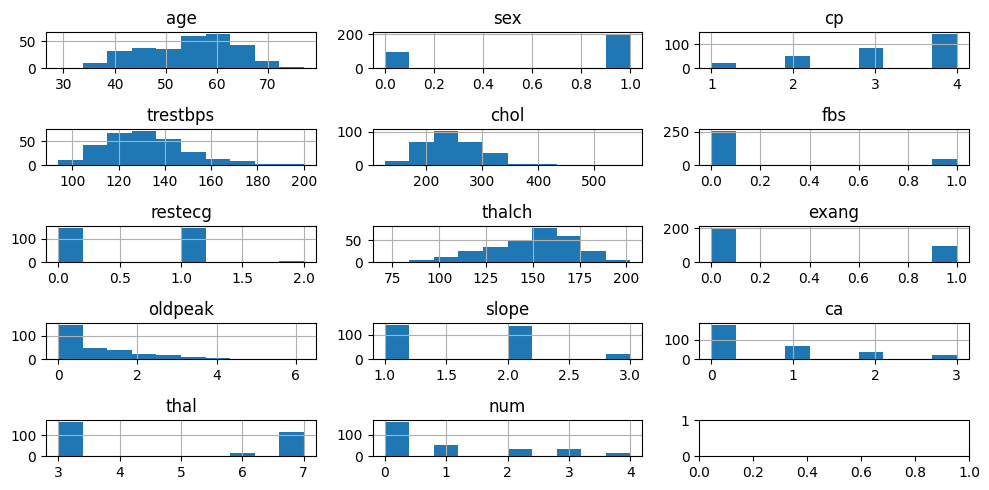

In [5]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
fig, axes = plt.subplots(5, 3)
df.hist('age', ax=axes[0][0])
df.hist('sex', ax=axes[0][1])
df.hist('cp', ax=axes[0][2])
df.hist('trestbps', ax=axes[1][0])
df.hist('chol', ax=axes[1][1])
df.hist('fbs', ax=axes[1][2])
df.hist('restecg', ax=axes[2][0])
df.hist('thalch', ax=axes[2][1])
df.hist('exang', ax=axes[2][2])
df.hist('oldpeak', ax=axes[3][0])
df.hist('slope', ax=axes[3][1])
df.hist('ca', ax=axes[3][2])
df.hist('thal', ax=axes[4][0])
df.hist('num', ax=axes[4][1])
plt.show()

In [6]:
df.shape

(297, 14)

In [7]:
data = df.values
# split into inputs and outputs
X = df.iloc[:,0:12].values
y =df.iloc[:,13].values
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(237, 12) (60, 12) (237,) (60,)


In [8]:
def models(X_train, X_test, y_train, y_test):
  knn = KNeighborsClassifier(9)
  knn.fit(X_train,y_train)
  y_pred_knn = knn.predict(X_test)
  acc_knn = accuracy_score(y_test, y_pred_knn)
  accuracy=[]
  accuracy.append(acc_knn)
  print('Accuracy Score of KNN:', acc_knn * 100)

  rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
  rf_ent.fit(X_train, y_train)
  y_pred_rfe = rf_ent.predict(X_test)
  acc_rfe = accuracy_score(y_test, y_pred_rfe)
  accuracy.append(acc_rfe)
  print('Accuracy Score of RF:', acc_rfe * 100)

  xgb = XGBClassifier()
  xgb.fit(X_train,y_train)
  y_pred_xgb = xgb.predict(X_test)
  acc_xgb = accuracy_score(y_test, y_pred_xgb)
  accuracy.append(acc_xgb)
  print('Accuracy Score of XGB:', acc_xgb * 100)

  svc = SVC(kernel='linear',gamma='auto',probability=True)
  svc.fit(X_train,y_train)
  y_pred_svc = svc.predict(X_test)
  acc_svc = accuracy_score(y_test, y_pred_svc)
  accuracy.append(acc_svc)
  print('Accuracy Score of SVC:', acc_svc * 100)

  stack = StackingClassifier(classifiers=[knn,rf_ent,xgb],meta_classifier=svc)
  stack.fit(X_train, y_train)
  y_pred_stack = stack.predict(X_test)
  acc_stack = accuracy_score(y_test, y_pred_stack)
  accuracy.append(acc_stack)
  print('Accuracy Score of Stacked model:', acc_stack * 100)

In [9]:
models(X_train, X_test, y_train, y_test)

Accuracy Score of KNN: 56.666666666666664
Accuracy Score of RF: 60.0
Accuracy Score of XGB: 61.66666666666667
Accuracy Score of SVC: 61.66666666666667
Accuracy Score of Stacked model: 63.33333333333333


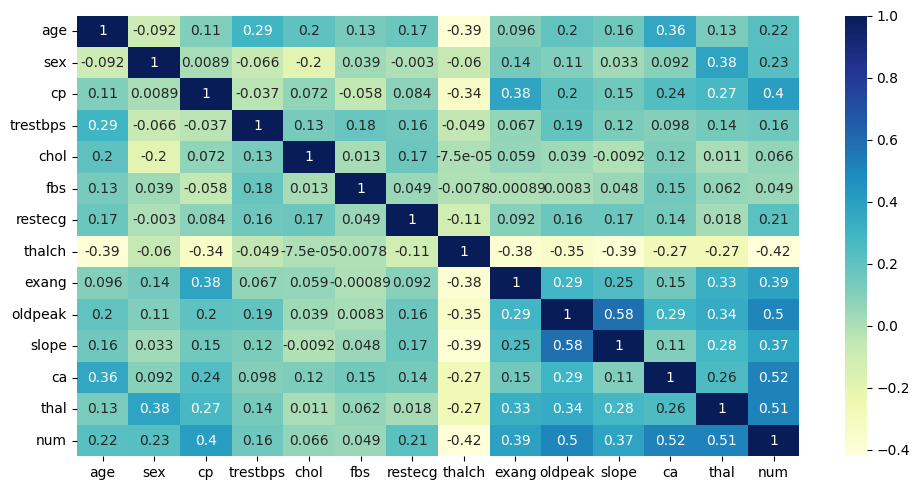

In [10]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
# plotting correlation heatmap
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
mp.show()
 

In [12]:
df[["age","sex","cp","trestbps","chol","fbs","restecg","thalch","exang","oldpeak","slope","ca","thal","num"]].corr()['num'][:]

age         0.222156
sex         0.226797
cp          0.404248
trestbps    0.159620
chol        0.066448
fbs         0.049040
restecg     0.214515
thalch     -0.420639
exang       0.391613
oldpeak     0.501461
slope       0.374689
ca          0.521178
thal        0.513377
num         1.000000
Name: num, dtype: float64

In [13]:
def plot_boxplot(df,ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show()

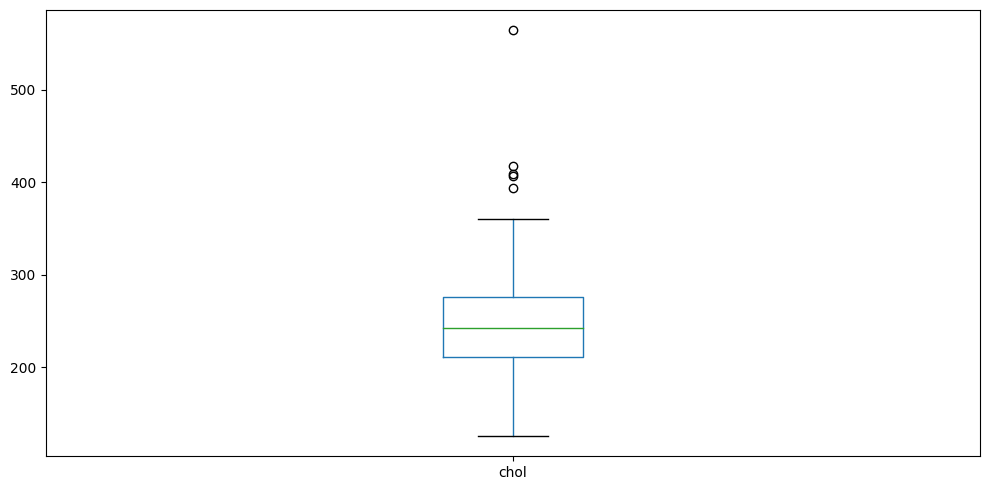

In [14]:
plot_boxplot(df,"chol")

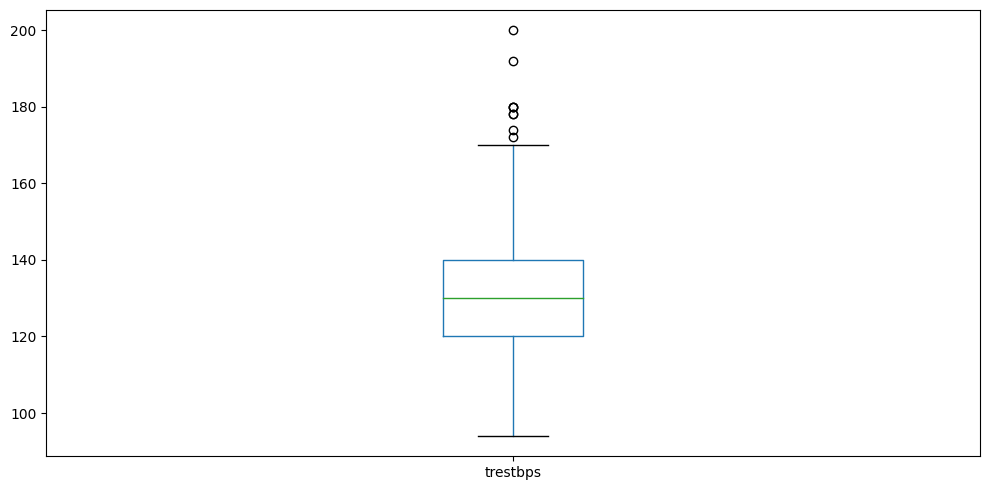

In [15]:
plot_boxplot(df,"trestbps")

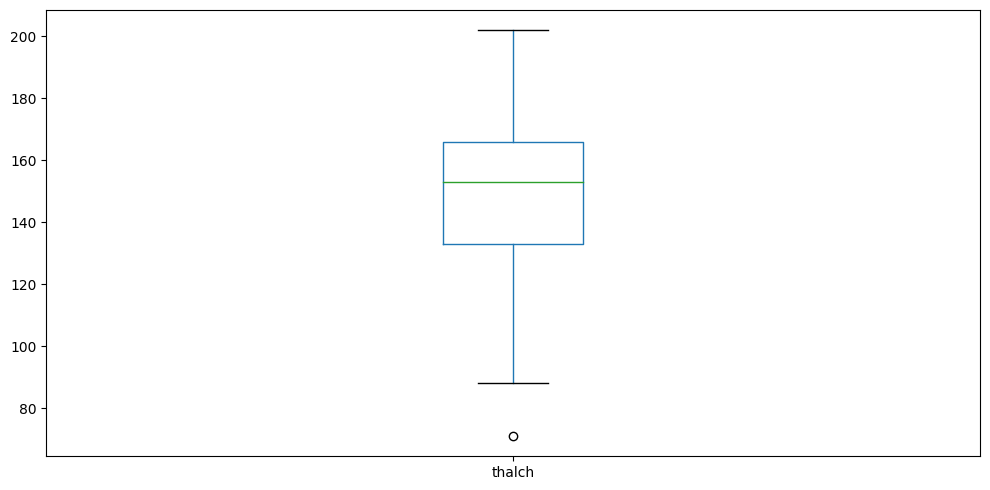

In [16]:
plot_boxplot(df,"thalch")

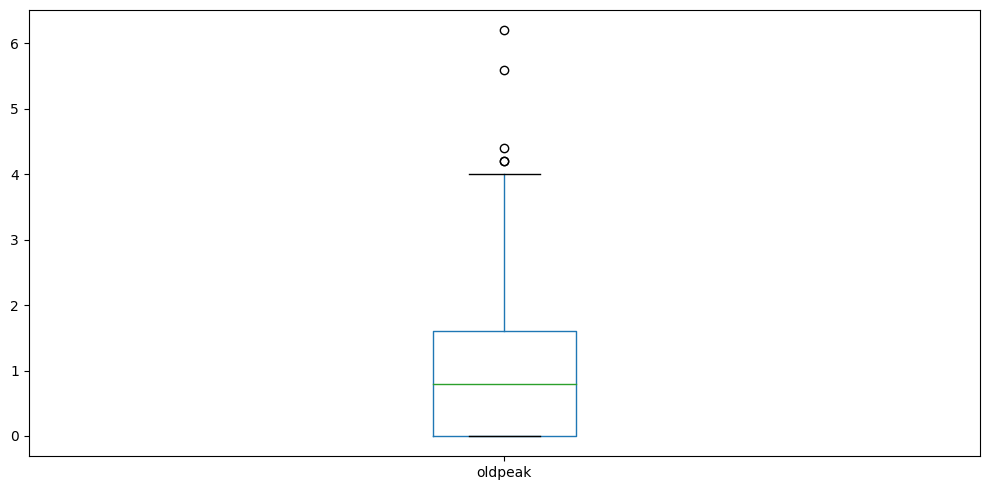

In [17]:
plot_boxplot(df,"oldpeak")

In [18]:
def outliers(df,ft):
  Q1=df[ft].quantile(0.25)
  Q3=df[ft].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  ls=df.index[(df[ft]<lower_bound)|(df[ft]>upper_bound)]
  return ls

In [19]:
index_list=[]
for feature in ['chol','trestbps','thalch','oldpeak']:
  index_list.extend(outliers(df,feature))

In [20]:
index_list

[48,
 120,
 151,
 171,
 179,
 14,
 83,
 125,
 170,
 181,
 186,
 198,
 210,
 228,
 242,
 90,
 122,
 181,
 189,
 281]

In [21]:
def remove(df,ls):
  ls=sorted(set(ls))
  df=df.drop(ls)
  return df

In [22]:
df_cleaned=remove(df,index_list)

In [23]:
df_cleaned.shape

(278, 14)

In [24]:
data = df_cleaned.values
# split into inputs and outputs
X = df_cleaned.iloc[:,0:12].values
y =df_cleaned.iloc[:,13].values
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(222, 12) (56, 12) (222,) (56,)


In [25]:
models(X_train, X_test, y_train, y_test)

Accuracy Score of KNN: 50.0
Accuracy Score of RF: 60.71428571428571
Accuracy Score of XGB: 62.5
Accuracy Score of SVC: 64.28571428571429
Accuracy Score of Stacked model: 62.5


In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score

In [28]:
df_cleaned.drop(labels = ['age', 'sex'], axis = 1, inplace = True)

In [29]:
df_cleaned.isnull().sum()

cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [30]:
X=df_cleaned[['cp','trestbps','chol','fbs','restecg','thalch','exang','oldpeak','slope','ca','thal']]
y=df_cleaned['num']

In [31]:
#Chi-2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
f_score = chi2(X_train, y_train)
f_score
p_values = pd.Series(f_score[1], index = X_train.columns)
p_values.sort_values(ascending = True, inplace = True)
p_values

thalch      2.890711e-36
ca          3.098071e-14
oldpeak     1.662967e-11
chol        2.496500e-11
thal        2.174889e-10
exang       8.909941e-06
cp          2.012639e-02
trestbps    5.638832e-02
restecg     2.066603e-01
slope       2.129548e-01
fbs         3.212727e-01
dtype: float64

<Axes: >

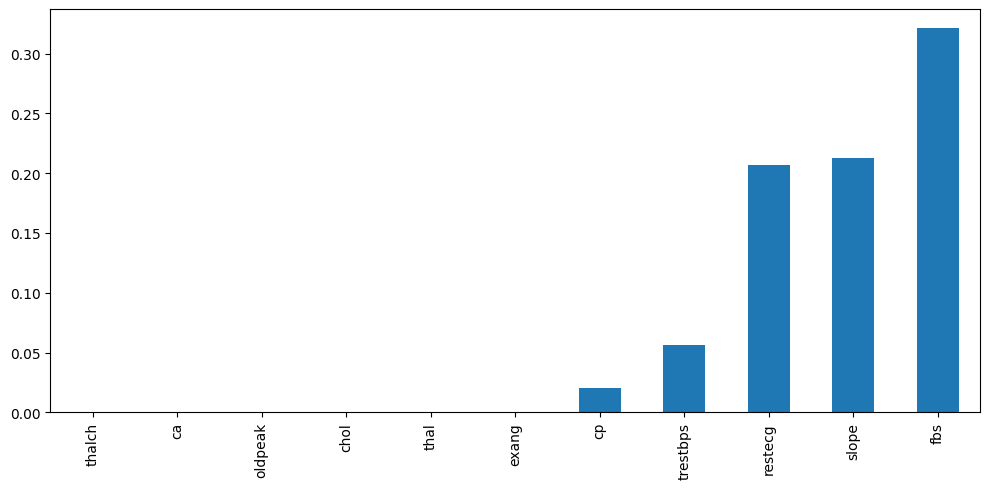

In [32]:
p_values.plot.bar()

In [33]:
X_train_2 = X_train[['thalch', 'ca','oldpeak','chol','thal','exang','cp']]
X_test_2 = X_test[['thalch', 'ca','oldpeak','chol','thal','exang','cp']]

In [34]:
models(X_train_2, X_test_2, y_train, y_test)

Accuracy Score of KNN: 67.85714285714286
Accuracy Score of RF: 67.85714285714286
Accuracy Score of XGB: 66.07142857142857
Accuracy Score of SVC: 67.85714285714286
Accuracy Score of Stacked model: 64.28571428571429


In [35]:
X_train_4 = X_train[['thalch', 'ca','oldpeak','chol','thal','exang','cp','trestbps']]
X_test_4 = X_test[['thalch', 'ca','oldpeak','chol','thal','exang','cp','trestbps']]

In [36]:
models(X_train_4, X_test_4, y_train, y_test)

Accuracy Score of KNN: 57.14285714285714
Accuracy Score of RF: 67.85714285714286
Accuracy Score of XGB: 64.28571428571429
Accuracy Score of SVC: 69.64285714285714
Accuracy Score of Stacked model: 66.07142857142857


In [37]:
X_train_3 = X_train[['thalch', 'ca','oldpeak','chol','thal','exang','cp','trestbps','slope']]
X_test_3 = X_test[['thalch', 'ca','oldpeak','chol','thal','exang','cp','trestbps','slope']]

In [38]:
models(X_train_3, X_test_3, y_train, y_test)

Accuracy Score of KNN: 57.14285714285714
Accuracy Score of RF: 69.64285714285714
Accuracy Score of XGB: 71.42857142857143
Accuracy Score of SVC: 71.42857142857143
Accuracy Score of Stacked model: 71.42857142857143


In [39]:
X_train_3.shape,X_test_3.shape,y_train.shape,y_test.shape

((222, 9), (56, 9), (222,), (56,))

In [40]:
def models_final(X_train, X_test, y_train, y_test):
  knn = KNeighborsClassifier(9)
  knn.fit(X_train,y_train)
  y_pred_knn = knn.predict(X_test)
  acc_knn = accuracy_score(y_test, y_pred_knn)
  accuracy=[] 
  accuracy.append(acc_knn)
  print('Accuracy Score of KNN:', acc_knn * 100)
  print('Precision Score of KNN:', precision_score(y_test, y_pred_knn,average='weighted')*100)
  print('Recall Score of KNN:', recall_score(y_test, y_pred_knn,average='weighted')*100)
  print('F1-Score of KNN:', f1_score(y_test, y_pred_knn,average='weighted')*100)

  rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
  rf_ent.fit(X_train, y_train)
  y_pred_rfe = rf_ent.predict(X_test)
  acc_rfe = accuracy_score(y_test, y_pred_rfe)
  accuracy.append(acc_rfe)
  print('\nAccuracy Score of RF:', acc_rfe * 100)
  print('Precision Score of RF:', precision_score(y_test, y_pred_rfe,average='weighted')*100)
  print('Recall Score of RF:', recall_score(y_test, y_pred_rfe,average='weighted')*100)
  print('F1-Score of RF:', f1_score(y_test, y_pred_rfe,average='weighted')*100)

  xgb = XGBClassifier()
  xgb.fit(X_train,y_train)
  y_pred_xgb = xgb.predict(X_test)
  acc_xgb = accuracy_score(y_test, y_pred_xgb)
  accuracy.append(acc_xgb)
  print('\nAccuracy Score of XGB:', acc_xgb * 100)
  print('Precision Score of XGB:', precision_score(y_test, y_pred_xgb,average='weighted')*100)
  print('Recall Score of XGB:', recall_score(y_test, y_pred_xgb,average='weighted')*100)
  print('F1-Score of XGB:', f1_score(y_test, y_pred_xgb,average='weighted')*100)

  svc = SVC(kernel='linear',gamma='auto',probability=True)
  svc.fit(X_train,y_train)
  y_pred_svc = svc.predict(X_test)
  acc_svc = accuracy_score(y_test, y_pred_svc)
  accuracy.append(acc_svc)
  print('\nAccuracy Score of SVC:', acc_svc * 100)
  print('Precision Score of SVC:', precision_score(y_test, y_pred_svc,average='weighted')*100)
  print('Recall Score of SVC:', recall_score(y_test, y_pred_svc,average='weighted')*100)
  print('F1-Score of SVC:', f1_score(y_test, y_pred_svc,average='weighted')*100)

  stack = StackingClassifier(classifiers=[knn,rf_ent,xgb],meta_classifier=svc)
  stack.fit(X_train, y_train)
  y_pred_stack = stack.predict(X_test)
  acc_stack = accuracy_score(y_test, y_pred_stack)
  accuracy.append(acc_stack)
  print('\nAccuracy Score of Stacking model:', acc_stack * 100)
  print('Precision Score of Stacking model:', precision_score(y_test, y_pred_stack,average='weighted')*100)
  print('Recall Score of Stacking model:', recall_score(y_test, y_pred_stack,average='weighted')*100)
  print('F1-Score of Stacking model:', f1_score(y_test, y_pred_stack,average='weighted')*100)


In [41]:
models_final(X_train_3, X_test_3, y_train, y_test)

Accuracy Score of KNN: 57.14285714285714
Precision Score of KNN: 51.59970238095239
Recall Score of KNN: 57.14285714285714
F1-Score of KNN: 51.169467787114854

Accuracy Score of RF: 71.42857142857143
Precision Score of RF: 63.87987012987013
Recall Score of RF: 71.42857142857143
F1-Score of RF: 66.984126984127

Accuracy Score of XGB: 71.42857142857143
Precision Score of XGB: 62.94573643410853
Recall Score of XGB: 71.42857142857143
F1-Score of XGB: 66.60192486085343

Accuracy Score of SVC: 71.42857142857143
Precision Score of SVC: 63.43344155844156
Recall Score of SVC: 71.42857142857143
F1-Score of SVC: 66.55982905982907

Accuracy Score of Stacking model: 73.21428571428571
Precision Score of Stacking model: 66.01190476190476
Recall Score of Stacking model: 73.21428571428571
F1-Score of Stacking model: 69.11944294403607


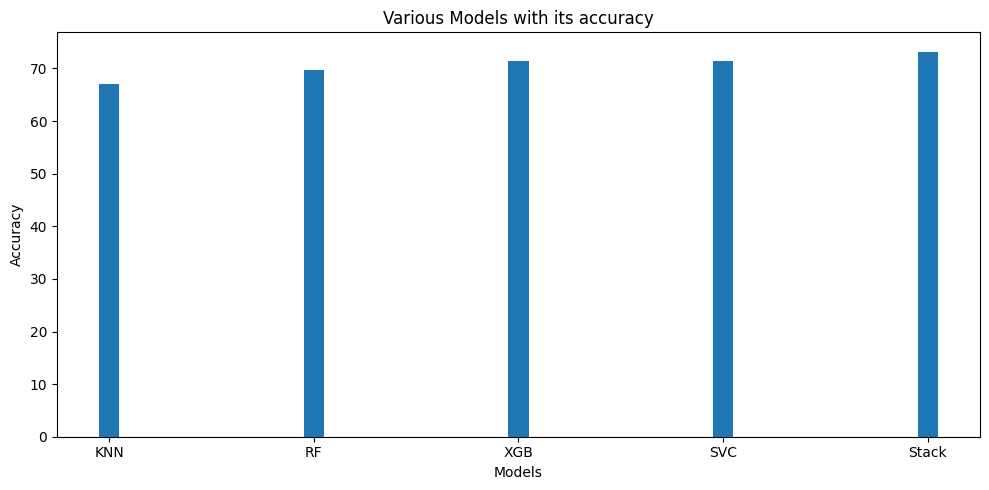

In [42]:
import matplotlib.pyplot as plt
models=['KNN','RF','XGB','SVC','Stack']
accuracy=[67.14,69.64,71.42,71.42,73.21]
plt.bar(models,accuracy,width=0.1)
plt.title("Various Models with its accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.rcParams["figure.figsize"] = [25, 15]
plt.show()